 <h1>Ejercicio de Modelado de Datos de Parkinson</h1>
    <p>Considere el conjunto de datos de seguimiento telemétrico de la enfermedad de Parkinson 
    (<a href="https://archive.ics.uci.edu/ml/datasets/Parkinsons+Telemonitoring" target="_blank">
        Parkinsons Telemonitoring - UCI Machine Learning Repository</a>), el cual contiene 19 características 
    entre las cuales hay varias derivadas de grabaciones de voz de pacientes con Parkinson. La idea es crear 
    un modelo que prediga a partir de la voz de un paciente la severidad de su enfermedad, la cual es cuantificada 
    con una escala estándar médica llamada UPDRS.</p>

<h2>Características del conjunto de datos:</h2>
<ul>
    <li>X1 - age</li>
    <li>X2 - test_time</li>
    <li>X3 - Jitter (%)</li>
    <li>X4 - Jitter (Abs)</li>
    <li>X5 - Jitter: RAP</li>
    <li>X6 - Jitter: PPQ5</li>
    <li>X7 - Jitter: DDP</li>
    <li>X8 - Shimmer</li>
    <li>X9 - Shimmer (dB)</li>
    <li>X10 - Shimmer: APQ3</li>
    <li>X11 - Shimmer: APQ5</li>
    <li>X12 - Shimmer: APQ11</li>
    <li>X13 - Shimmer: DDA</li>
    <li>X14 - NHR</li>
    <li>X15 - HNR</li>
    <li>X16 - RPDE</li>
    <li>X17 - DFA</li>
    <li>X18 - PPE</li>
    <li>X19 - sex</li>
</ul>

<p>Como variables dependientes, se tienen <strong>motor_UPDRS</strong> y <strong>total_UPDRS</strong>. 
Para este ejercicio, se te asignó un conjunto de variables predictoras y una de las variables dependientes 
de acuerdo a tu matrícula.</p>

<h2>Instrucciones:</h2>
<ol>
    <li>Evalúa con validación cruzada un modelo de regresión lineal para las variables asignadas según tu matrícula 
    utilizando alguna librería o framework.</li>
    <li>Encuentra el número óptimo de predictores para el modelo utilizando el método <strong>filter</strong> 
    y validación cruzada. Una vez que tengas el número óptimo, muestra las características seleccionadas.</li>
    <li>Repite el paso anterior pero con selección de características secuencial (<strong>Wrapper</strong>). Reporta 
    los predictores óptimos encontrados por el método.</li>
    <li>Haz el mismo proceso del paso 2, pero ahora con el método de selección de características recursivo. Reporta 
    los predictores óptimos encontrados por el método.</li>
    <li>Repite los pasos anteriores, pero utilizando un modelo de regresión no lineal como <strong>K-vecinos más cercanos</strong>.</li>
    <li>Busca al menos otros 4 modelos de regresión no lineal, y lleva a cabo los pasos del 1 al 5.</li>
</ol>

<h2>Conclusiones:</h2>
<p>Viendo los resultados de este ejercicio, escribe una conclusión sobre los siguientes puntos:</p>
<ul>
    <li>Consideras que el modelo de regresión lineal es adecuado para los datos. ¿Por qué?</li>
    <li>¿Qué método de selección de características consideras que funciona bien con los datos? ¿Por qué?</li>
    <li>Del proceso de selección de características, ¿puedes identificar algunas que sean sobresalientes? ¿Qué información relevantes observas de dichas características?</li>
    <li>¿Los modelos de regresión no lineal funcionaron mejor que el lineal? ¿Por qué?</li>
    <li>¿Se puede concluir algo interesante sobre los resultados de modelar estos datos con regresión? Argumenta tu respuesta.</li>
</ul>

<h2>Nota:</h2>
<p>Las variables con las que vas a trabajar depende del último número de tu matrícula de acuerdo a la siguiente lista:</p>
<ul>
    <li>0 - Todas las variables predictoras, menos X1, X6, X11, X16, la variable motor_UPDRS como variable a predecir.</li>
    <li>1 - Todas las variables predictoras, menos X2, X7, X12, X17, la variable total_UPDRS como variable a predecir.</li>
    <li>2 - Todas las variables predictoras, menos X3, X8, X13, X18, la variable motor_UPDRS como variable a predecir.</li>
    <li>3 - Todas las variables predictoras, menos X4, X9, X14, X19, la variable total_UPDRS como variable a predecir.</li>
    <li>4 - Todas las variables predictoras, menos X5, X10, X15, X19, la variable motor_UPDRS como variable a predecir.</li>
    <li>5 - Todas las variables predictoras, menos X1, X5, X9, X13, la variable total_UPDRS como variable a predecir.</li>
    <li>6 - Todas las variables predictoras, menos X2, X6, X10, X14, la variable motor_UPDRS como variable a predecir.</li>
    <li>7 - Todas las variables predictoras, menos X3, X7, X11, X15, la variable total_UPDRS como variable a predecir.</li>
    <li>8 - Todas las variables predictoras, menos X4, X8, X12, X16, la variable motor_UPDRS como variable a predecir.</li>
    <li>9 - Todas las variables predictoras, menos X5, X9, X13, X17, la variable total_UPDRS como variable a predecir.</li>
</ul>

Mis variables: 
5 - Todas las variables predictoras, menos X1, X5, X9, X13, la variable total_UPDRS como variable a predecir.

In [45]:
from ucimlrepo import fetch_ucirepo 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import SelectKBest, r_regression
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import f_regression

In [46]:
# fetch dataset 
parkinsons_telemonitoring = fetch_ucirepo(id=189) 
  
# data (as pandas dataframes) 
x_df = parkinsons_telemonitoring.data.features 
y_df = parkinsons_telemonitoring.data.targets 

In [47]:
x_df

,age,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,sex
0,72,5.6431,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006,0
1,72,12.6660,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810,0
2,72,19.6810,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014,0
3,72,25.6470,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277,0
4,72,33.6420,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,61,142.7900,0.00406,0.000031,0.00167,0.00168,0.00500,0.01896,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367,0
5871,61,149.8400,0.00297,0.000025,0.00119,0.00147,0.00358,0.02315,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621,0
5872,61,156.8200,0.00349,0.000025,0.00152,0.00187,0.00456,0.02499,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157,0
5873,61,163.7300,0.00281,0.000020,0.00128,0.00151,0.00383,0.01484,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204,0


In [48]:
y_df

,motor_UPDRS,total_UPDRS
0,28.199,34.398
1,28.447,34.894
2,28.695,35.389
3,28.905,35.810
4,29.187,36.375
...,...,...
5870,22.485,33.485
5871,21.988,32.988
5872,21.495,32.495
5873,21.007,32.007


In [49]:
x = x_df.to_numpy()
y = y_df['total_UPDRS'].to_numpy()

In [50]:
x

array([[7.2000e+01, 5.6431e+00, 6.6200e-03, ..., 5.4842e-01, 1.6006e-01,
        0.0000e+00],
       [7.2000e+01, 1.2666e+01, 3.0000e-03, ..., 5.6477e-01, 1.0810e-01,
        0.0000e+00],
       [7.2000e+01, 1.9681e+01, 4.8100e-03, ..., 5.4405e-01, 2.1014e-01,
        0.0000e+00],
       ...,
       [6.1000e+01, 1.5682e+02, 3.4900e-03, ..., 5.7888e-01, 1.4157e-01,
        0.0000e+00],
       [6.1000e+01, 1.6373e+02, 2.8100e-03, ..., 5.6327e-01, 1.4204e-01,
        0.0000e+00],
       [6.1000e+01, 1.7073e+02, 2.8200e-03, ..., 5.7077e-01, 1.5336e-01,
        0.0000e+00]])

In [51]:
y

array([34.398, 34.894, 35.389, ..., 32.495, 32.007, 31.513])

<h2>1. Evalúa con validación cruzada un modelo de regresión lineal para las variables asignadas según tu matrícula utilizando alguna librería o framework.</h2>

In [52]:
# Select features
regr = linear_model.LinearRegression()
regr.fit(x,y)
print("")
print("Model coefficients: ", regr.coef_)
print("Model intercept: ", regr.intercept_)

y_pred = regr.predict(x)
print('MSE: ', mean_squared_error(y, y_pred))
print("MAE: ", mean_absolute_error(y, y_pred))
print("R^2: ", r2_score(y, y_pred))


Model coefficients:  [ 3.02962702e-01  1.65481539e-02  4.33747089e+01 -6.40742007e+04
 -3.95220975e+04 -3.38584944e+02  1.34546659e+04  1.49255683e+02
 -8.90430196e+00 -1.46628336e+04 -6.25723199e+01  5.34465939e+01
  4.81477233e+03 -1.52248302e+01 -6.27075065e-01  4.04285386e+00
 -3.14791092e+01  1.75236922e+01 -2.79238947e+00]
Model intercept:  39.7236973265005
MSE:  94.26682396291315
MAE:  8.043510286542743
R^2:  0.17654047896121272


In [53]:
# Evaluate model using cross validation
mse_cv = []
mae_cv = []
r2_cv = []

kf = KFold(n_splits=5, shuffle = True)
for train_index, test_index in kf.split(x):

    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]     

    fselection_cv = SelectKBest(r_regression, k=5)
    fselection_cv.fit(x_train, y_train)
    x_train = fselection_cv.transform(x_train)

    regr_cv = linear_model.LinearRegression()
    regr_cv.fit(x_train, y_train)

    # Test phase
    x_test = fselection_cv.transform(x[test_index, :])
    y_test = y[test_index]
    y_pred = regr_cv.predict(x_test)

    mse_i = mean_squared_error(y_test, y_pred)
    mse_cv.append(mse_i)

    mae_i = mean_absolute_error(y_test, y_pred)
    mae_cv.append(mae_i)

    r2_i = r2_score(y_test, y_pred)    
    r2_cv.append(r2_i)    

print('MSE:', np.average(mse_cv), '  MAE:', np.average(mae_cv),'  R^2:', np.average(r2_cv))


MSE: 101.1519873143213   MAE: 8.339088729268362   R^2: 0.11485875092878817


<h2>2. Encuentra el número óptimo de predictores para el modelo utilizando el método <strong>filter</strong>y validación cruzada. Una vez que tengas el número óptimo, muestra las características seleccionadas.</h2>

In [54]:
# Find optimal number of features using cross-validation
#------------------------------------------------------------------------------------------------------------------
print("----- Optimal selection of number of features -----")

n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9]

mse_nfeat = []
mae_nfeat = []
r2_nfeat = []
for n_feat in n_feats:
    print('---- n features =', n_feat)

    mse_cv = []
    mae_cv = []
    r2_cv = []

    kf = KFold(n_splits=5, shuffle=True)

    for train_index, test_index in kf.split(x):
        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]

        fselection_cv = SelectKBest(r_regression, k=n_feat)
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)

        regr_cv = linear_model.LinearRegression()
        regr_cv.fit(x_train, y_train)

        # Test phase
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = regr_cv.predict(x_test)

        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)

        mae_i = mean_absolute_error(y_test, y_pred)
        mae_cv.append(mae_i)

        r2_i = r2_score(y_test, y_pred)
        r2_cv.append(r2_i)

    mse = np.average(mse_cv)
    mse_nfeat.append(mse)

    mae = np.average(mae_cv)
    mae_nfeat.append(mae)

    r2 = np.average(r2_cv)
    r2_nfeat.append(r2)

    print('MSE:', mse, '  MAE:', mae, '  R^2:', r2)

opt_index = np.argmin(mse_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

----- Optimal selection of number of features -----
---- n features = 1
MSE: 103.62918404571477   MAE: 8.479470760901766   R^2: 0.09304764528096683
---- n features = 2
MSE: 101.9590449410878   MAE: 8.356876704608775   R^2: 0.10857058444763619
---- n features = 3
MSE: 101.33338260220218   MAE: 8.328151634078202   R^2: 0.11359819465493551
---- n features = 4
MSE: 101.2454707772062   MAE: 8.326486809658169   R^2: 0.11524708795384035
---- n features = 5
MSE: 101.1387408035946   MAE: 8.34020342177187   R^2: 0.11566015843985059
---- n features = 6
MSE: 101.01650788543718   MAE: 8.338642696505753   R^2: 0.11670504909307447
---- n features = 7
MSE: 101.01952036731132   MAE: 8.340808545311432   R^2: 0.11680604108163495
---- n features = 8
MSE: 100.90559541415148   MAE: 8.343685605204943   R^2: 0.11804721687725779
---- n features = 9
MSE: 100.90897820481499   MAE: 8.34080278689813   R^2: 0.11748229204558683
Optimal number of features:  8


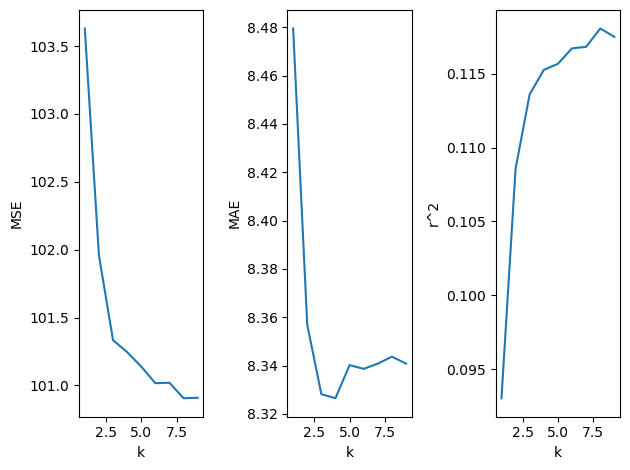

Selected features:  ['x0' 'x7' 'x8' 'x10' 'x11' 'x12' 'x15' 'x17']
Model coefficients:  [   0.35009664   29.22336519    1.00011263 -104.57651453   67.89366436
  -21.00247806    9.72925938    8.75018264]
Model intercept:  -0.8424775583392758


In [55]:
fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot(n_feats, mse_nfeat)
axs[0].set_xlabel("k")
axs[0].set_ylabel("MSE")

axs[1].plot(n_feats, mae_nfeat)
axs[1].set_xlabel("k")
axs[1].set_ylabel("MAE")

axs[2].plot(n_feats, r2_nfeat)
axs[2].set_xlabel("k")
axs[2].set_ylabel("r^2")

plt.show()

# Fit model with optimal number of features
regr = linear_model.LinearRegression()
fselection = SelectKBest(r_regression, k = opt_features)
fselection.fit(x, y)

print("Selected features: ", fselection.get_feature_names_out())

x_transformed = fselection.transform(x)
regr.fit(x_transformed, y)
print("Model coefficients: ", regr.coef_)
print("Model intercept: ", regr.intercept_)

<h2>3. Repite el paso anterior pero con selección de características secuencial (<strong>Wrapper</strong>). Reporta los predictores óptimos encontrados por el método</h2>

In [56]:
################################################################################
# Find optimal number of features using cross-validation
################################################################################
print("----- Optimal selection of number of features -----")

n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9]

mse_nfeat = []
mae_nfeat = []
r2_nfeat = []
for n_feat in n_feats:
    print('---- n features =', n_feat)
    
    mse_cv = []
    mae_cv = []
    r2_cv = []

    kf = KFold(n_splits=5, shuffle = True)

    for train_index, test_index in kf.split(x):
    
        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]     

        regr_cv = linear_model.LinearRegression()

        fselection_cv = SequentialFeatureSelector(regr_cv, n_features_to_select=n_feat)
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)

        regr_cv.fit(x_train, y_train)

        # Test phase
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = regr_cv.predict(x_test)
    
        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)
    
        mae_i = mean_absolute_error(y_test, y_pred)
        mae_cv.append(mae_i)

        r2_i = r2_score(y_test, y_pred)    
        r2_cv.append(r2_i)      
    

    mse = np.average(mse_cv)
    mse_nfeat.append(mse)
    
    mae = np.average(mae_cv)
    mae_nfeat.append(mae)
    
    r2 = np.average(r2_cv)
    r2_nfeat.append(r2)
    
    print('MSE:', mse, '  MAE:', mae,'  R^2:', r2)

opt_index = np.argmin(mse_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)


----- Optimal selection of number of features -----
---- n features = 1
MSE: 103.51408497155242   MAE: 8.474068558244731   R^2: 0.09511296579200298
---- n features = 2
MSE: 101.58988913840906   MAE: 8.359875122475879   R^2: 0.11237737136864971
---- n features = 3
MSE: 101.46221212428485   MAE: 8.343176361283769   R^2: 0.11309529246124377
---- n features = 4
MSE: 101.3341815561178   MAE: 8.367801281290966   R^2: 0.11443296317781934
---- n features = 5
MSE: 101.41163347757313   MAE: 8.378220125391811   R^2: 0.1138084924832579
---- n features = 6
MSE: 101.16171514077783   MAE: 8.384995411339755   R^2: 0.11601194434734378
---- n features = 7
MSE: 101.011321280261   MAE: 8.365497934212737   R^2: 0.1169085146788977
---- n features = 8
MSE: 100.73496284153313   MAE: 8.379385709288524   R^2: 0.11924335059966215
---- n features = 9
MSE: 100.44984558206002   MAE: 8.379214952307928   R^2: 0.12173735002879141
Optimal number of features:  9


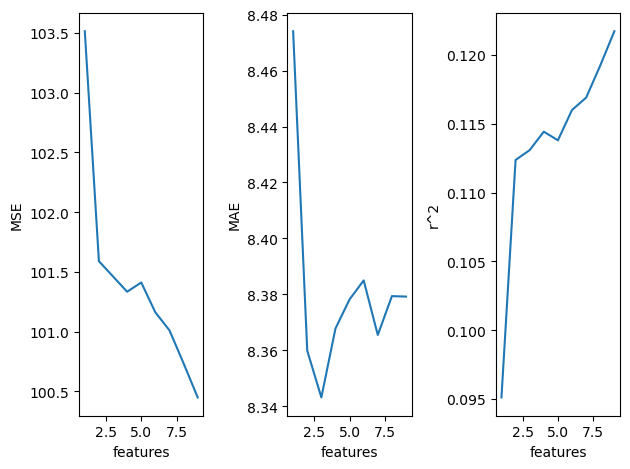

Selected features:  ['x0' 'x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x13' 'x14']
Model coefficients:  [ 3.48901933e-01  1.50856324e-02  7.65667536e+02 -4.57234213e+04
 -4.33347234e+04 -5.88635841e+02  1.43228429e+04 -7.39547213e+00
 -5.09326400e-01]
Model intercept:  16.60950684340548


In [57]:
fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot(n_feats, mse_nfeat)
axs[0].set_xlabel("features")
axs[0].set_ylabel("MSE")

axs[1].plot(n_feats, mae_nfeat)
axs[1].set_xlabel("features")
axs[1].set_ylabel("MAE")

axs[2].plot(n_feats, r2_nfeat)
axs[2].set_xlabel("features")
axs[2].set_ylabel("r^2")

plt.show()

# Fit model with optimal number of features
regr = linear_model.LinearRegression()
fselection = SequentialFeatureSelector(regr, n_features_to_select = opt_features)
fselection.fit(x, y)

print("Selected features: ", fselection.get_feature_names_out())

x_transformed = fselection.transform(x)
regr.fit(x_transformed, y)
print("Model coefficients: ", regr.coef_)
print("Model intercept: ", regr.intercept_)

<h2>4. Haz el mismo proceso del paso 2, pero ahora con el método de selección de características recursivo. Reporta los predictores óptimos encontrados por el método.</h2>

In [58]:
################################################################################
# Find optimal number of features using cross-validation
################################################################################
print("----- Optimal selection of number of features -----")

n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9]

mse_nfeat = []
mae_nfeat = []
r2_nfeat = []
for n_feat in n_feats:
    print('---- n features =', n_feat)
    
    mse_cv = []
    mae_cv = []
    r2_cv = []

    kf = KFold(n_splits=5, shuffle = True)

    for train_index, test_index in kf.split(x):
    
        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]     

        regr_cv = linear_model.LinearRegression()

        fselection_cv = RFE(regr_cv, n_features_to_select=n_feat)
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)

        regr_cv.fit(x_train, y_train)

        # Test phase
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = regr_cv.predict(x_test)
    
        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)
    
        mae_i = mean_absolute_error(y_test, y_pred)
        mae_cv.append(mae_i)

        r2_i = r2_score(y_test, y_pred)    
        r2_cv.append(r2_i)      
    

    mse = np.average(mse_cv)
    mse_nfeat.append(mse)
    
    mae = np.average(mae_cv)
    mae_nfeat.append(mae)
    
    r2 = np.average(r2_cv)
    r2_nfeat.append(r2)
    
    print('MSE:', mse, '  MAE:', mae,'  R^2:', r2)

opt_index = np.argmin(mse_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

----- Optimal selection of number of features -----
---- n features = 1
MSE: 114.07408904719583   MAE: 8.645331374531551   R^2: 0.0032233437615718286
---- n features = 2
MSE: 114.18635872006398   MAE: 8.647996703533286   R^2: 0.001296523787478021
---- n features = 3
MSE: 114.10896641750101   MAE: 8.653179407703545   R^2: 0.0030214490905007716
---- n features = 4
MSE: 113.90164220294965   MAE: 8.639697990357666   R^2: 0.004311437956015162
---- n features = 5
MSE: 113.88226871605771   MAE: 8.640552796072765   R^2: 0.004988083844721047
---- n features = 6
MSE: 113.79073842208307   MAE: 8.647782880042362   R^2: 0.0047810466628714025
---- n features = 7
MSE: 112.27076151279941   MAE: 8.576461682430324   R^2: 0.019201747012284366
---- n features = 8
MSE: 112.40237040076356   MAE: 8.593440466282242   R^2: 0.01846953704582608
---- n features = 9
MSE: 111.77723864929814   MAE: 8.570423780038045   R^2: 0.023343242403482335
Optimal number of features:  9


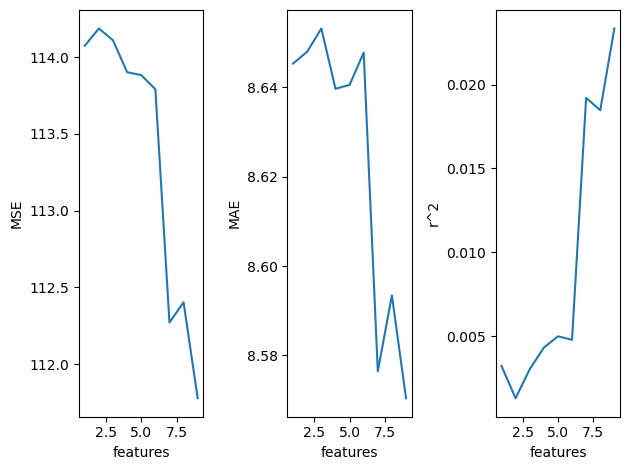

Selected features:  ['x3' 'x4' 'x5' 'x6' 'x9' 'x10' 'x11' 'x12' 'x17']
Model coefficients:  [-4.84330012e+04 -4.23152156e+04 -1.69887799e+02  1.41990052e+04
 -1.72375824e+04 -1.54779137e+02  1.32534587e+02  5.75873903e+03
  2.68682574e+01]
Model intercept:  23.77863613742343


In [59]:
fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot(n_feats, mse_nfeat)
axs[0].set_xlabel("features")
axs[0].set_ylabel("MSE")

axs[1].plot(n_feats, mae_nfeat)
axs[1].set_xlabel("features")
axs[1].set_ylabel("MAE")

axs[2].plot(n_feats, r2_nfeat)
axs[2].set_xlabel("features")
axs[2].set_ylabel("r^2")

plt.show()

# Fit model with optimal number of features
regr = linear_model.LinearRegression()
fselection = RFE(regr, n_features_to_select = opt_features)
fselection.fit(x, y)

print("Selected features: ", fselection.get_feature_names_out())

x_transformed = fselection.transform(x)
regr.fit(x_transformed, y)
print("Model coefficients: ", regr.coef_)
print("Model intercept: ", regr.intercept_)


<h2>5. Repite los pasos anteriores, pero utilizando un modelo de regresión no lineal como K-vecinos más cercanos</h2>

<h2>5.1</h2>

----- Optimal selection of number of features -----
---- n features = 1
MSE: 63.05519518519932   MAE: 5.742139074042553   R^2: 0.44730791228326144
---- n features = 2
MSE: 34.42037654159409   MAE: 4.244518355744681   R^2: 0.6990147842590396
---- n features = 3
MSE: 29.37543210058172   MAE: 3.755755417872341   R^2: 0.7427864437279169
---- n features = 4
MSE: 28.14788165273716   MAE: 3.6542715812765953   R^2: 0.7535954845570584
---- n features = 5
MSE: 26.68116749352327   MAE: 3.541585126808511   R^2: 0.7667730346306618
---- n features = 6
MSE: 26.553828745994622   MAE: 3.530282219574468   R^2: 0.7674931717424383
---- n features = 7
MSE: 26.67794872244977   MAE: 3.5408191829787237   R^2: 0.7665643409340749
---- n features = 8
MSE: 22.211043353362996   MAE: 3.0831280374468086   R^2: 0.806081524640218
---- n features = 9
MSE: 21.88127563141549   MAE: 3.048538536170213   R^2: 0.8090862753378449
Optimal number of features:  9


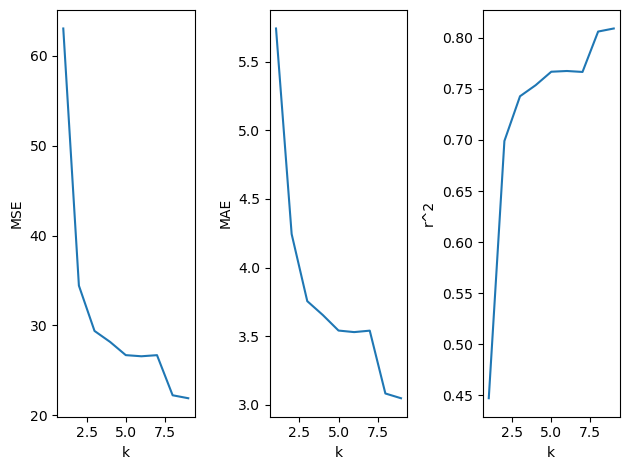

Selected features:  ['x0' 'x7' 'x8' 'x9' 'x10' 'x11' 'x12' 'x15' 'x17']


KNeighborsRegressor()

In [60]:
# Find optimal number of features using cross-validation
#------------------------------------------------------------------------------------------------------------------
print("----- Optimal selection of number of features -----")

n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9]

mse_nfeat = []
mae_nfeat = []
r2_nfeat = []

for n_feat in n_feats:
    print('---- n features =', n_feat)

    mse_cv = []
    mae_cv = []
    r2_cv = []

    kf = KFold(n_splits=5, shuffle=True)

    for train_index, test_index in kf.split(x):
        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]

        fselection_cv = SelectKBest(r_regression, k=n_feat)
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)

        # Replace LinearRegression with KNeighborsRegressor
        regr_cv = KNeighborsRegressor(n_neighbors=5)  # Adjust n_neighbors
        regr_cv.fit(x_train, y_train)

        # Test phase
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = regr_cv.predict(x_test)

        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)

        mae_i = mean_absolute_error(y_test, y_pred)
        mae_cv.append(mae_i)

        r2_i = r2_score(y_test, y_pred)
        r2_cv.append(r2_i)

    mse = np.average(mse_cv)
    mse_nfeat.append(mse)

    mae = np.average(mae_cv)
    mae_nfeat.append(mae)

    r2 = np.average(r2_cv)
    r2_nfeat.append(r2)

    print('MSE:', mse, '  MAE:', mae, '  R^2:', r2)

opt_index = np.argmin(mse_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot(n_feats, mse_nfeat)
axs[0].set_xlabel("k")
axs[0].set_ylabel("MSE")

axs[1].plot(n_feats, mae_nfeat)
axs[1].set_xlabel("k")
axs[1].set_ylabel("MAE")

axs[2].plot(n_feats, r2_nfeat)
axs[2].set_xlabel("k")
axs[2].set_ylabel("r^2")

plt.show()

# Fit model with optimal number of features using kNN
regr = KNeighborsRegressor(n_neighbors=5)
fselection = SelectKBest(r_regression, k=opt_features)
fselection.fit(x, y)

print("Selected features: ", fselection.get_feature_names_out())

x_transformed = fselection.transform(x)
regr.fit(x_transformed, y)

<h2>5.2</h2>

----- Optimal selection of number of features -----
---- n features = 1
MSE: 123.20462241111856   MAE: 8.733029113191492   R^2: -0.07515308809968613
---- n features = 2
MSE: 88.43164161635607   MAE: 6.859049245957446   R^2: 0.23021866156955356
---- n features = 3
MSE: 86.48684965073961   MAE: 6.788792626382978   R^2: 0.23151049287497197
---- n features = 4
MSE: 85.24782669768558   MAE: 6.729055084255319   R^2: 0.2415540646847048
---- n features = 5
MSE: 42.6952077443251   MAE: 4.285481446808511   R^2: 0.6379719079384284
---- n features = 6
MSE: 63.18078050547065   MAE: 5.4245613140425535   R^2: 0.4441906384393535
---- n features = 7
MSE: 86.69192922755889   MAE: 6.740670941276596   R^2: 0.24856526426161546
---- n features = 8
MSE: 85.62685818199706   MAE: 6.709063843404254   R^2: 0.24603601935474245
---- n features = 9
MSE: 66.70763367136654   MAE: 5.601273307234043   R^2: 0.4347796611547744
Optimal number of features:  5


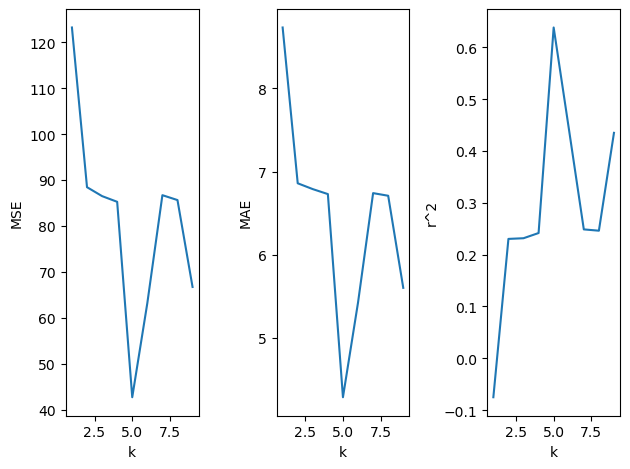

Selected features:  ['x0' 'x8' 'x11' 'x15' 'x17']


KNeighborsRegressor()

In [61]:
# Find optimal number of features using cross-validation
#------------------------------------------------------------------------------------------------------------------
print("----- Optimal selection of number of features -----")

n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9]

mse_nfeat = []
mae_nfeat = []
r2_nfeat = []

for n_feat in n_feats:
    print('---- n features =', n_feat)

    mse_cv = []
    mae_cv = []
    r2_cv = []

    kf = KFold(n_splits=5, shuffle=True)

    for train_index, test_index in kf.split(x):
        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]

        fselection_cv = SequentialFeatureSelector(regr_cv, n_features_to_select=n_feat)
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)

        # Replace LinearRegression with KNeighborsRegressor
        regr_cv = KNeighborsRegressor(n_neighbors=5)  # Adjust n_neighbors
        regr_cv.fit(x_train, y_train)

        # Test phase
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = regr_cv.predict(x_test)

        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)

        mae_i = mean_absolute_error(y_test, y_pred)
        mae_cv.append(mae_i)

        r2_i = r2_score(y_test, y_pred)
        r2_cv.append(r2_i)

    mse = np.average(mse_cv)
    mse_nfeat.append(mse)

    mae = np.average(mae_cv)
    mae_nfeat.append(mae)

    r2 = np.average(r2_cv)
    r2_nfeat.append(r2)

    print('MSE:', mse, '  MAE:', mae, '  R^2:', r2)

opt_index = np.argmin(mse_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot(n_feats, mse_nfeat)
axs[0].set_xlabel("k")
axs[0].set_ylabel("MSE")

axs[1].plot(n_feats, mae_nfeat)
axs[1].set_xlabel("k")
axs[1].set_ylabel("MAE")

axs[2].plot(n_feats, r2_nfeat)
axs[2].set_xlabel("k")
axs[2].set_ylabel("r^2")

plt.show()

# Fit model with optimal number of features using kNN
regr = KNeighborsRegressor(n_neighbors=5)
fselection = SelectKBest(r_regression, k=opt_features)
fselection.fit(x, y)

print("Selected features: ", fselection.get_feature_names_out())

x_transformed = fselection.transform(x)
regr.fit(x_transformed, y)

<h2>6. Busca al menos otros 4 modelos de regresión no lineal, y lleva a cabo los pasos del 1 al 5.</h2>

In [62]:
n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9]

<h3>6.1 DecisionTreeRegressor</h3>

<strong>DecisionTreeRegressor con SelectKBest</strong>

----- DecisionTreeRegressor with SelectKBest -----
---- n features = 1
MSE: 34.553004757411095   MAE: 4.674213325569377   R^2: 0.6977439796937984
---- n features = 2
MSE: 57.46552402955556   MAE: 5.066755897872341   R^2: 0.4972511640853686
---- n features = 3
MSE: 50.299753175019575   MAE: 4.577949344680851   R^2: 0.5602226762561465
---- n features = 4
MSE: 44.691855546388084   MAE: 4.225564340425532   R^2: 0.6087294664272985
---- n features = 5
MSE: 42.37643384418893   MAE: 4.1347407829787235   R^2: 0.6285862196469961
---- n features = 6
MSE: 43.512689740905536   MAE: 4.115262025531915   R^2: 0.6197688855038006
---- n features = 7
MSE: 41.749387972025524   MAE: 4.0557666553191485   R^2: 0.6341594590358872
---- n features = 8
MSE: 36.80848534182979   MAE: 3.2808435574468087   R^2: 0.6769302202790416
---- n features = 9
MSE: 38.47784008713872   MAE: 3.6487635744680844   R^2: 0.6639612107855057
Optimal number of features:  1


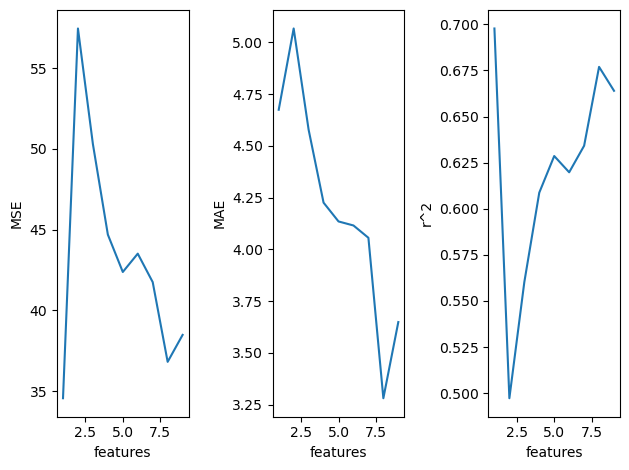

Selected features:  ['x0']


DecisionTreeRegressor()

In [63]:
################################################################################
# DecisionTreeRegressor con SelectKBest
################################################################################
print("----- DecisionTreeRegressor with SelectKBest -----")
mse_nfeat = []
mae_nfeat = []
r2_nfeat = []
for n_feat in n_feats:
    print('---- n features =', n_feat)

    mse_cv = []
    mae_cv = []
    r2_cv = []

    kf = KFold(n_splits=5, shuffle=True)

    for train_index, test_index in kf.split(x):
        x_train = x[train_index, :]
        y_train = y[train_index]

        regr_cv = DecisionTreeRegressor()

        fselection_cv = SelectKBest(r_regression, k=n_feat)
        x_train = fselection_cv.fit_transform(x_train, y_train)

        regr_cv.fit(x_train, y_train)

        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = regr_cv.predict(x_test)

        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)

        mae_i = mean_absolute_error(y_test, y_pred)
        mae_cv.append(mae_i)

        r2_i = r2_score(y_test, y_pred)
        r2_cv.append(r2_i)

    mse = np.average(mse_cv)
    mse_nfeat.append(mse)

    mae = np.average(mae_cv)
    mae_nfeat.append(mae)

    r2 = np.average(r2_cv)
    r2_nfeat.append(r2)

    print('MSE:', mse, '  MAE:', mae, '  R^2:', r2)

opt_index = np.argmin(mse_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot(n_feats, mse_nfeat)
axs[0].set_xlabel("features")
axs[0].set_ylabel("MSE")

axs[1].plot(n_feats, mae_nfeat)
axs[1].set_xlabel("features")
axs[1].set_ylabel("MAE")

axs[2].plot(n_feats, r2_nfeat)
axs[2].set_xlabel("features")
axs[2].set_ylabel("r^2")

plt.show()

regr = DecisionTreeRegressor()
fselection = SelectKBest(r_regression, k=opt_features)
fselection.fit(x, y)

print("Selected features: ", fselection.get_feature_names_out())

x_transformed = fselection.transform(x)
regr.fit(x_transformed, y)

<strong>DecisionTreeRegressor con SequentialFeatureSelector</strong>

----- DecisionTreeRegressor with SequentialFeatureSelector -----
---- n features = 1
MSE: 114.48459474435933   MAE: 8.650566253028144   R^2: 6.416208493729148e-05
---- n features = 2
MSE: 116.19548722698558   MAE: 8.691613446719469   R^2: -0.015386626973783634
---- n features = 3
MSE: 20.004144503281374   MAE: 3.1576116718817353   R^2: 0.8252080324424902
---- n features = 4
MSE: 16.43354202295489   MAE: 2.1836572255319147   R^2: 0.8557412745155636
---- n features = 5
MSE: 20.587564203657873   MAE: 3.0590138723404254   R^2: 0.8200115025038851
---- n features = 6
MSE: 16.516771940531065   MAE: 2.5087326978723405   R^2: 0.8562943764562464
---- n features = 7
MSE: 13.595293594789785   MAE: 1.9942833531914892   R^2: 0.8809416781366763
---- n features = 8
MSE: 13.694955453365106   MAE: 2.0038176   R^2: 0.882442817092349
---- n features = 9
MSE: 13.432722107354895   MAE: 1.9819317617021277   R^2: 0.8832739879609811
Optimal number of features:  9


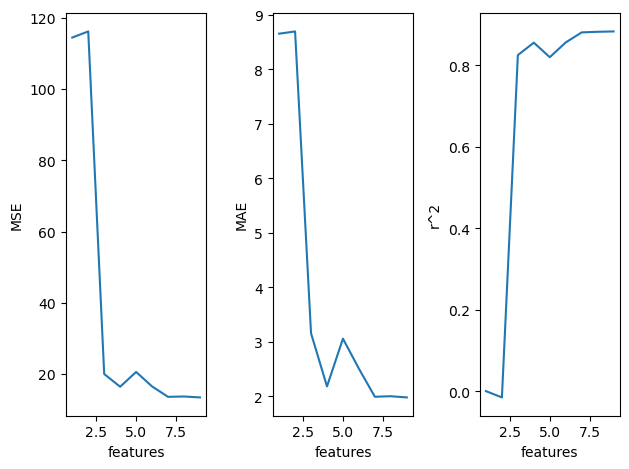

Selected features:  ['x0' 'x1' 'x3' 'x5' 'x10' 'x11' 'x12' 'x14' 'x18']


DecisionTreeRegressor()

In [64]:
################################################################################
# DecisionTreeRegressor con SequentialFeatureSelector
################################################################################
print("----- DecisionTreeRegressor with SequentialFeatureSelector -----")
mse_nfeat = []
mae_nfeat = []
r2_nfeat = []
for n_feat in n_feats:
    print('---- n features =', n_feat)

    mse_cv = []
    mae_cv = []
    r2_cv = []

    kf = KFold(n_splits=5, shuffle=True)

    for train_index, test_index in kf.split(x):
        x_train = x[train_index, :]
        y_train = y[train_index]

        regr_cv = DecisionTreeRegressor()

        fselection_cv = SequentialFeatureSelector(regr_cv, n_features_to_select=n_feat)
        x_train = fselection_cv.fit_transform(x_train, y_train)

        regr_cv.fit(x_train, y_train)

        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = regr_cv.predict(x_test)

        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)

        mae_i = mean_absolute_error(y_test, y_pred)
        mae_cv.append(mae_i)

        r2_i = r2_score(y_test, y_pred)
        r2_cv.append(r2_i)

    mse = np.average(mse_cv)
    mse_nfeat.append(mse)

    mae = np.average(mae_cv)
    mae_nfeat.append(mae)

    r2 = np.average(r2_cv)
    r2_nfeat.append(r2)

    print('MSE:', mse, '  MAE:', mae, '  R^2:', r2)

opt_index = np.argmin(mse_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot(n_feats, mse_nfeat)
axs[0].set_xlabel("features")
axs[0].set_ylabel("MSE")

axs[1].plot(n_feats, mae_nfeat)
axs[1].set_xlabel("features")
axs[1].set_ylabel("MAE")

axs[2].plot(n_feats, r2_nfeat)
axs[2].set_xlabel("features")
axs[2].set_ylabel("r^2")

plt.show()

regr = DecisionTreeRegressor()
fselection = SequentialFeatureSelector(regr, n_features_to_select=opt_features)
fselection.fit(x, y)

print("Selected features: ", fselection.get_feature_names_out())

x_transformed = fselection.transform(x)
regr.fit(x_transformed, y)

<strong>DecisionTreeRegressor con RFE</strong>

----- DecisionTreeRegressor with RFE -----
---- n features = 1
MSE: 34.59557989626551   MAE: 4.676925546068331   R^2: 0.6971040887271607
---- n features = 2
MSE: 32.3690345532504   MAE: 3.320535892198582   R^2: 0.7107707627164209
---- n features = 3
MSE: 16.680714538113882   MAE: 2.1238528839716313   R^2: 0.852894794274057
---- n features = 4
MSE: 6.028921719002552   MAE: 0.4774400340425534   R^2: 0.9472303826369431
---- n features = 5
MSE: 5.157190915788936   MAE: 0.4846888170212768   R^2: 0.9547274468206574
---- n features = 6
MSE: 6.669617163998298   MAE: 0.5770312680851064   R^2: 0.9414802742601678
---- n features = 7
MSE: 9.125024946086807   MAE: 0.6800556595744681   R^2: 0.9203373485401528
---- n features = 8
MSE: 8.679579849358298   MAE: 0.7127847148936172   R^2: 0.9240101688310833
---- n features = 9
MSE: 7.335770910057872   MAE: 0.632916340425532   R^2: 0.935463915172716
Optimal number of features:  5


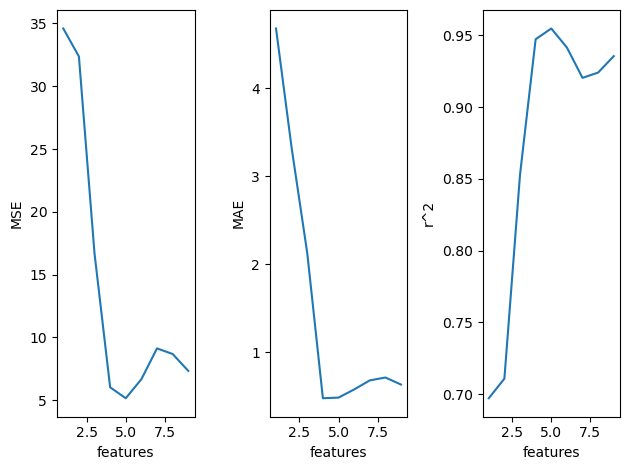

Selected features:  ['x0' 'x1' 'x15' 'x16' 'x18']


DecisionTreeRegressor()

In [65]:
################################################################################
# DecisionTreeRegressor con RFE
################################################################################
print("----- DecisionTreeRegressor with RFE -----")
mse_nfeat = []
mae_nfeat = []
r2_nfeat = []
for n_feat in n_feats:
    print('---- n features =', n_feat)

    mse_cv = []
    mae_cv = []
    r2_cv = []

    kf = KFold(n_splits=5, shuffle=True)

    for train_index, test_index in kf.split(x):
        x_train = x[train_index, :]
        y_train = y[train_index]

        regr_cv = DecisionTreeRegressor()

        fselection_cv = RFE(regr_cv, n_features_to_select=n_feat)
        x_train = fselection_cv.fit_transform(x_train, y_train)

        regr_cv.fit(x_train, y_train)

        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = regr_cv.predict(x_test)

        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)

        mae_i = mean_absolute_error(y_test, y_pred)
        mae_cv.append(mae_i)

        r2_i = r2_score(y_test, y_pred)
        r2_cv.append(r2_i)

    mse = np.average(mse_cv)
    mse_nfeat.append(mse)

    mae = np.average(mae_cv)
    mae_nfeat.append(mae)

    r2 = np.average(r2_cv)
    r2_nfeat.append(r2)

    print('MSE:', mse, '  MAE:', mae, '  R^2:', r2)

opt_index = np.argmin(mse_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot(n_feats, mse_nfeat)
axs[0].set_xlabel("features")
axs[0].set_ylabel("MSE")

axs[1].plot(n_feats, mae_nfeat)
axs[1].set_xlabel("features")
axs[1].set_ylabel("MAE")

axs[2].plot(n_feats, r2_nfeat)
axs[2].set_xlabel("features")
axs[2].set_ylabel("r^2")

plt.show()

regr = DecisionTreeRegressor()
fselection = RFE(regr, n_features_to_select=opt_features)
fselection.fit(x, y)

print("Selected features: ", fselection.get_feature_names_out())

x_transformed = fselection.transform(x)
regr.fit(x_transformed, y)


<h3>6.2 RandomForestRegressor</h3>

<strong>RandomForestRegressor con SelectKBest</strong>

----- RandomForestRegressor with SelectKBest -----
---- n features = 1
MSE: 34.54216515052437   MAE: 4.672512957053503   R^2: 0.6971912577806277
---- n features = 2
MSE: 42.27623580246128   MAE: 4.503814881864019   R^2: 0.6302950061790231
---- n features = 3
MSE: 30.86888255273633   MAE: 3.822733841702128   R^2: 0.7300168015227497
---- n features = 4
MSE: 25.62194993674093   MAE: 3.459669741957447   R^2: 0.7757097014819274
---- n features = 5
MSE: 24.25271985574974   MAE: 3.3907148228085107   R^2: 0.7880801964749061
---- n features = 6
MSE: 24.090708499499705   MAE: 3.388552712340425   R^2: 0.7891485623479862
---- n features = 7
MSE: 22.10938933739083   MAE: 3.090275374297873   R^2: 0.8060923220193285
---- n features = 8
MSE: 21.626075408443732   MAE: 3.0631035952340424   R^2: 0.8104753888730878
---- n features = 9
MSE: 21.586387450091006   MAE: 3.0731686754042555   R^2: 0.810489207757238
Optimal number of features:  9


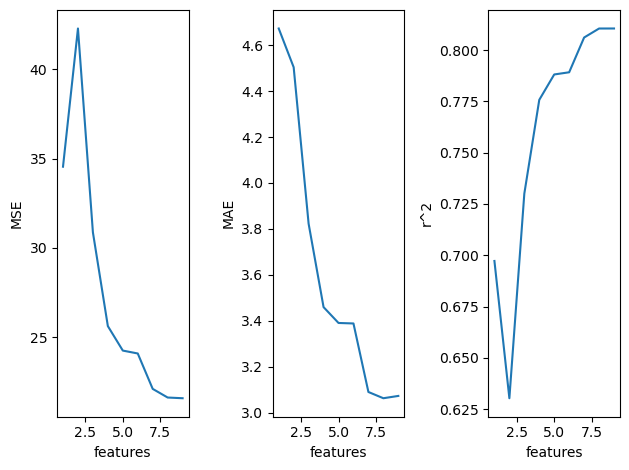

Selected features:  ['x0' 'x7' 'x8' 'x9' 'x10' 'x11' 'x12' 'x15' 'x17']


RandomForestRegressor()

In [66]:
################################################################################
# RandomForestRegressor con SelectKBest
################################################################################
print("----- RandomForestRegressor with SelectKBest -----")
mse_nfeat = []
mae_nfeat = []
r2_nfeat = []
for n_feat in n_feats:
    print('---- n features =', n_feat)

    mse_cv = []
    mae_cv = []
    r2_cv = []

    kf = KFold(n_splits=5, shuffle=True)

    for train_index, test_index in kf.split(x):
        x_train = x[train_index, :]
        y_train = y[train_index]

        regr_cv = RandomForestRegressor()

        fselection_cv = SelectKBest(r_regression, k=n_feat)
        x_train = fselection_cv.fit_transform(x_train, y_train)

        regr_cv.fit(x_train, y_train)

        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = regr_cv.predict(x_test)

        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)

        mae_i = mean_absolute_error(y_test, y_pred)
        mae_cv.append(mae_i)

        r2_i = r2_score(y_test, y_pred)
        r2_cv.append(r2_i)

    mse = np.average(mse_cv)
    mse_nfeat.append(mse)

    mae = np.average(mae_cv)
    mae_nfeat.append(mae)

    r2 = np.average(r2_cv)
    r2_nfeat.append(r2)

    print('MSE:', mse, '  MAE:', mae, '  R^2:', r2)

opt_index = np.argmin(mse_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot(n_feats, mse_nfeat)
axs[0].set_xlabel("features")
axs[0].set_ylabel("MSE")

axs[1].plot(n_feats, mae_nfeat)
axs[1].set_xlabel("features")
axs[1].set_ylabel("MAE")

axs[2].plot(n_feats, r2_nfeat)
axs[2].set_xlabel("features")
axs[2].set_ylabel("r^2")

plt.show()

regr = RandomForestRegressor()
fselection = SelectKBest(r_regression, k=opt_features)
fselection.fit(x, y)

print("Selected features: ", fselection.get_feature_names_out())

x_transformed = fselection.transform(x)
regr.fit(x_transformed, y)

<strong>RandomForestRegressor con SequentialFeatureSelector</strong>

----- RandomForestRegressor with SequentialFeatureSelector -----
---- n features = 1
MSE: 114.55040624243718   MAE: 8.69690958764946   R^2: -0.0014358312878450352
---- n features = 2
MSE: 114.59569974743927   MAE: 8.679170117215744   R^2: -0.002120623176523284
---- n features = 3
MSE: 121.82752032905005   MAE: 8.737331890353394   R^2: -0.06580124039108784
---- n features = 4
MSE: 106.33085351131274   MAE: 8.24623165361702   R^2: 0.0701930205144012
---- n features = 5
MSE: 98.83119049935172   MAE: 7.860378986553191   R^2: 0.13536361582266418
---- n features = 6
MSE: 91.60536269896429   MAE: 7.525789435234041   R^2: 0.2006122108509787
---- n features = 7
MSE: 92.27133925245906   MAE: 7.572480085787236   R^2: 0.19388261943138663
---- n features = 8
MSE: 89.10087146269511   MAE: 7.39847049855319   R^2: 0.22141157806777895
---- n features = 9
MSE: 87.03543670475884   MAE: 7.3210099434893605   R^2: 0.2394401032164904
Optimal number of features:  9


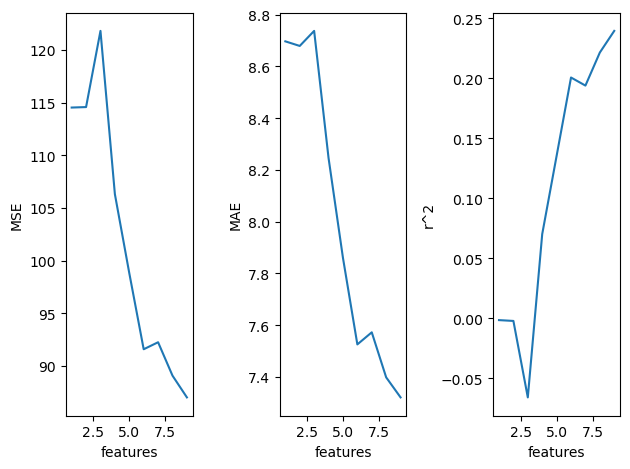

Selected features:  ['x1' 'x2' 'x3' 'x9' 'x10' 'x11' 'x13' 'x17' 'x18']


RandomForestRegressor()

In [67]:
################################################################################
# RandomForestRegressor con SequentialFeatureSelector
################################################################################
print("----- RandomForestRegressor with SequentialFeatureSelector -----")
mse_nfeat = []
mae_nfeat = []
r2_nfeat = []
for n_feat in n_feats:
    print('---- n features =', n_feat)

    mse_cv = []
    mae_cv = []
    r2_cv = []

    kf = KFold(n_splits=5, shuffle=True)

    for train_index, test_index in kf.split(x):
        x_train = x[train_index, :]
        y_train = y[train_index]

        regr_cv = RandomForestRegressor()

        fselection_cv = SequentialFeatureSelector(regr_cv, n_features_to_select=n_feat)
        x_train = fselection_cv.fit_transform(x_train, y_train)

        regr_cv.fit(x_train, y_train)

        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = regr_cv.predict(x_test)

        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)

        mae_i = mean_absolute_error(y_test, y_pred)
        mae_cv.append(mae_i)

        r2_i = r2_score(y_test, y_pred)
        r2_cv.append(r2_i)

    mse = np.average(mse_cv)
    mse_nfeat.append(mse)

    mae = np.average(mae_cv)
    mae_nfeat.append(mae)

    r2 = np.average(r2_cv)
    r2_nfeat.append(r2)

    print('MSE:', mse, '  MAE:', mae, '  R^2:', r2)

opt_index = np.argmin(mse_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot(n_feats, mse_nfeat)
axs[0].set_xlabel("features")
axs[0].set_ylabel("MSE")

axs[1].plot(n_feats, mae_nfeat)
axs[1].set_xlabel("features")
axs[1].set_ylabel("MAE")

axs[2].plot(n_feats, r2_nfeat)
axs[2].set_xlabel("features")
axs[2].set_ylabel("r^2")

plt.show()

regr = RandomForestRegressor()
fselection = SequentialFeatureSelector(regr, n_features_to_select=opt_features)
fselection.fit(x, y)

print("Selected features: ", fselection.get_feature_names_out())

x_transformed = fselection.transform(x)
regr.fit(x_transformed, y)

<strong>RandomForestRegressor con RFE</strong>

----- RandomForestRegressor with RFE -----
---- n features = 1
MSE: 34.479701944280336   MAE: 4.671677796852007   R^2: 0.6984562572928208
---- n features = 2
MSE: 29.56461835611493   MAE: 3.693395756060925   R^2: 0.7412916257517376
---- n features = 3
MSE: 16.99649876925725   MAE: 2.7995216538889567   R^2: 0.8515518797884356
---- n features = 4
MSE: 3.916666771294873   MAE: 0.6051825251063835   R^2: 0.965643020628125
---- n features = 5
MSE: 3.4717896066876164   MAE: 0.6178021782127662   R^2: 0.9693876363865161
---- n features = 6
MSE: 3.2233737848371717   MAE: 0.6465915416170207   R^2: 0.9717403869906412
---- n features = 7
MSE: 3.068227692986814   MAE: 0.6657663402553186   R^2: 0.9732063276039774
---- n features = 8
MSE: 3.1572112347105743   MAE: 0.6681639429787231   R^2: 0.972487637860873
---- n features = 9
MSE: 3.063063428688296   MAE: 0.7009379979574459   R^2: 0.9731553626762622
Optimal number of features:  9


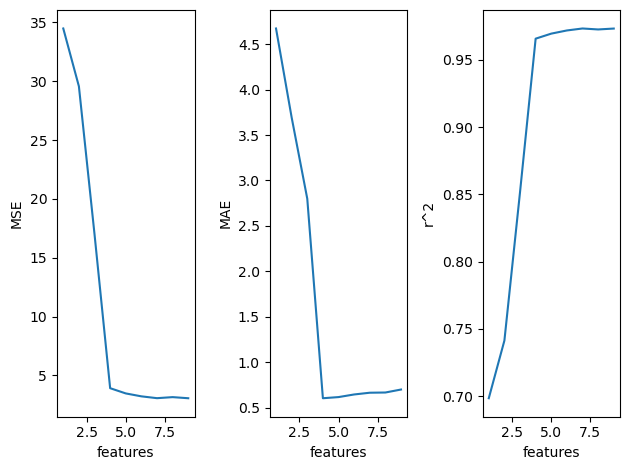

Selected features:  ['x0' 'x1' 'x3' 'x12' 'x13' 'x14' 'x15' 'x16' 'x18']


RandomForestRegressor()

In [68]:
################################################################################
# RandomForestRegressor con RFE
################################################################################
print("----- RandomForestRegressor with RFE -----")
mse_nfeat = []
mae_nfeat = []
r2_nfeat = []
for n_feat in n_feats:
    print('---- n features =', n_feat)

    mse_cv = []
    mae_cv = []
    r2_cv = []

    kf = KFold(n_splits=5, shuffle=True)

    for train_index, test_index in kf.split(x):
        x_train = x[train_index, :]
        y_train = y[train_index]

        regr_cv = RandomForestRegressor()

        fselection_cv = RFE(regr_cv, n_features_to_select=n_feat)
        x_train = fselection_cv.fit_transform(x_train, y_train)

        regr_cv.fit(x_train, y_train)

        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = regr_cv.predict(x_test)

        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)

        mae_i = mean_absolute_error(y_test, y_pred)
        mae_cv.append(mae_i)

        r2_i = r2_score(y_test, y_pred)
        r2_cv.append(r2_i)

    mse = np.average(mse_cv)
    mse_nfeat.append(mse)

    mae = np.average(mae_cv)
    mae_nfeat.append(mae)

    r2 = np.average(r2_cv)
    r2_nfeat.append(r2)

    print('MSE:', mse, '  MAE:', mae, '  R^2:', r2)

opt_index = np.argmin(mse_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot(n_feats, mse_nfeat)
axs[0].set_xlabel("features")
axs[0].set_ylabel("MSE")

axs[1].plot(n_feats, mae_nfeat)
axs[1].set_xlabel("features")
axs[1].set_ylabel("MAE")

axs[2].plot(n_feats, r2_nfeat)
axs[2].set_xlabel("features")
axs[2].set_ylabel("r^2")

plt.show()

regr = RandomForestRegressor()
fselection = RFE(regr, n_features_to_select=opt_features)
fselection.fit(x, y)

print("Selected features: ", fselection.get_feature_names_out())

x_transformed = fselection.transform(x)
regr.fit(x_transformed, y)

<h3>6.3 SVR</h3>

<strong>SVR con SelectKBest</strong>

----- SVR con SelectKBest -----
---- n features = 1
MSE: 93.24654539370015   MAE: 7.688229015070851   R^2: 0.18545917509165066
---- n features = 2
MSE: 105.08623624442126   MAE: 8.270331617973204   R^2: 0.08220577751269756
---- n features = 3
MSE: 103.67409786320218   MAE: 8.202823414048964   R^2: 0.09428667766398809
---- n features = 4
MSE: 103.84206318905129   MAE: 8.218386764971608   R^2: 0.0920754287400033
---- n features = 5
MSE: 103.88464635015123   MAE: 8.221371198968543   R^2: 0.09244607509387645
---- n features = 6
MSE: 104.02880905492889   MAE: 8.228566417915607   R^2: 0.08965743753268929
---- n features = 7
MSE: 103.9982926026934   MAE: 8.228707967901373   R^2: 0.09112845791329902
---- n features = 8
MSE: 104.00455987822613   MAE: 8.228590437685401   R^2: 0.09018105809839835
---- n features = 9
MSE: 103.96756364606067   MAE: 8.228792714427971   R^2: 0.09143023158266098
Optimal number of features:  1


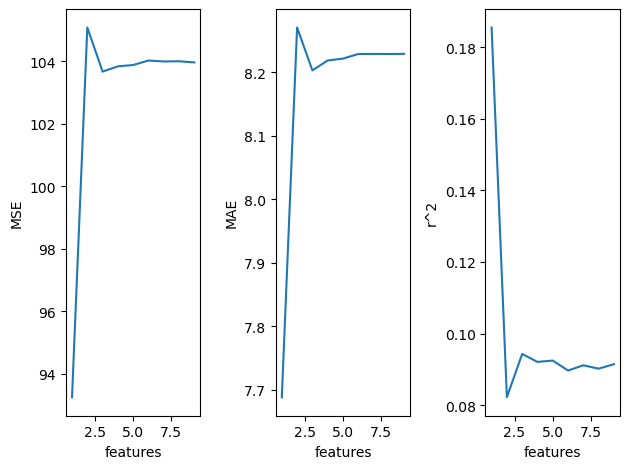

Selected features:  ['x0']


SVR()

In [69]:
################################################################################
# SVR con SelectKBest
################################################################################
print("----- SVR con SelectKBest -----")
mse_nfeat = []
mae_nfeat = []
r2_nfeat = []
for n_feat in n_feats:
    print('---- n features =', n_feat)

    mse_cv = []
    mae_cv = []
    r2_cv = []

    kf = KFold(n_splits=5, shuffle=True)

    for train_index, test_index in kf.split(x):
        x_train = x[train_index, :]
        y_train = y[train_index]

        svr_cv = SVR()

        fselection_cv = SelectKBest(f_regression, k=n_feat)
        x_train = fselection_cv.fit_transform(x_train, y_train)

        svr_cv.fit(x_train, y_train)

        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = svr_cv.predict(x_test)

        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)

        mae_i = mean_absolute_error(y_test, y_pred)
        mae_cv.append(mae_i)

        r2_i = r2_score(y_test, y_pred)
        r2_cv.append(r2_i)

    mse = np.average(mse_cv)
    mse_nfeat.append(mse)

    mae = np.average(mae_cv)
    mae_nfeat.append(mae)

    r2 = np.average(r2_cv)
    r2_nfeat.append(r2)

    print('MSE:', mse, '  MAE:', mae, '  R^2:', r2)

opt_index = np.argmin(mse_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot(n_feats, mse_nfeat)
axs[0].set_xlabel("features")
axs[0].set_ylabel("MSE")

axs[1].plot(n_feats, mae_nfeat)
axs[1].set_xlabel("features")
axs[1].set_ylabel("MAE")

axs[2].plot(n_feats, r2_nfeat)
axs[2].set_xlabel("features")
axs[2].set_ylabel("r^2")

plt.show()

svr = SVR()
fselection = SelectKBest(f_regression, k=opt_features)
fselection.fit(x, y)

print("Selected features: ", fselection.get_feature_names_out())

x_transformed = fselection.transform(x)
svr.fit(x_transformed, y)

<strong>SVR con SequentialFeatureSelector</strong>

----- SVR con SequentialFeatureSelector -----
---- n features = 1
MSE: 113.55227239691104   MAE: 8.482070898460368   R^2: 0.00764827240692405
---- n features = 2
MSE: 111.95738692754625   MAE: 8.358647183205267   R^2: 0.02129043999701976
---- n features = 3
MSE: 111.71168875280107   MAE: 8.357652953377334   R^2: 0.023983990201990157
---- n features = 4
MSE: 111.7394783653775   MAE: 8.385649798283964   R^2: 0.023407244104565916
---- n features = 5
MSE: 111.97206445870611   MAE: 8.395915157057257   R^2: 0.02154217474046709
---- n features = 6
MSE: 113.0594912712216   MAE: 8.448038992799864   R^2: 0.011861970122514798
---- n features = 7
MSE: 112.64654999122592   MAE: 8.428858503084468   R^2: 0.015508239482283415
---- n features = 8
MSE: 112.00986309573958   MAE: 8.40836705374372   R^2: 0.02092662873812523
---- n features = 9
MSE: 112.14724509664742   MAE: 8.415686798792253   R^2: 0.020127549529987188
Optimal number of features:  3


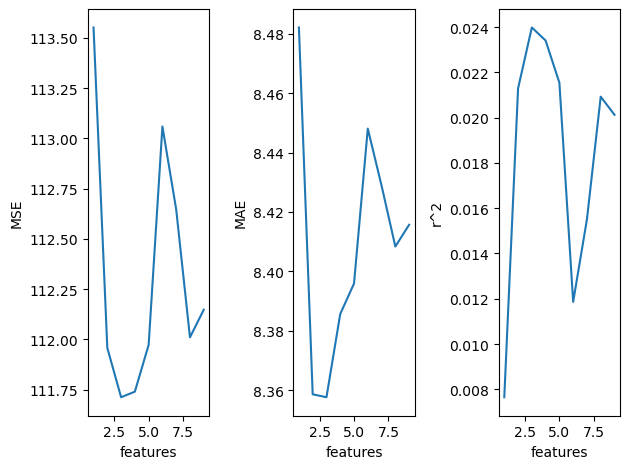

Selected features:  ['x8' 'x11' 'x15']


SVR()

In [70]:
################################################################################
# SVR con SequentialFeatureSelector
################################################################################
print("----- SVR con SequentialFeatureSelector -----")
mse_nfeat = []
mae_nfeat = []
r2_nfeat = []
for n_feat in n_feats:
    print('---- n features =', n_feat)

    mse_cv = []
    mae_cv = []
    r2_cv = []

    kf = KFold(n_splits=5, shuffle=True)

    for train_index, test_index in kf.split(x):
        x_train = x[train_index, :]
        y_train = y[train_index]

        svr_cv = SVR()

        fselection_cv = SequentialFeatureSelector(svr_cv, n_features_to_select=n_feat)
        x_train = fselection_cv.fit_transform(x_train, y_train)

        svr_cv.fit(x_train, y_train)

        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = svr_cv.predict(x_test)

        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)

        mae_i = mean_absolute_error(y_test, y_pred)
        mae_cv.append(mae_i)

        r2_i = r2_score(y_test, y_pred)
        r2_cv.append(r2_i)

    mse = np.average(mse_cv)
    mse_nfeat.append(mse)

    mae = np.average(mae_cv)
    mae_nfeat.append(mae)

    r2 = np.average(r2_cv)
    r2_nfeat.append(r2)

    print('MSE:', mse, '  MAE:', mae, '  R^2:', r2)

opt_index = np.argmin(mse_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot(n_feats, mse_nfeat)
axs[0].set_xlabel("features")
axs[0].set_ylabel("MSE")

axs[1].plot(n_feats, mae_nfeat)
axs[1].set_xlabel("features")
axs[1].set_ylabel("MAE")

axs[2].plot(n_feats, r2_nfeat)
axs[2].set_xlabel("features")
axs[2].set_ylabel("r^2")

plt.show()

svr = SVR()
fselection = SequentialFeatureSelector(svr, n_features_to_select=opt_features)
fselection.fit(x, y)

print("Selected features: ", fselection.get_feature_names_out())

x_transformed = fselection.transform(x)
svr.fit(x_transformed, y)

<strong>SVR con RFE</strong>

In [71]:
################################################################################
# SVR con RFE
################################################################################
print("----- SVR con RFE -----")
mse_nfeat = []
mae_nfeat = []
r2_nfeat = []
for n_feat in n_feats:
    print('---- n features =', n_feat)

    mse_cv = []
    mae_cv = []
    r2_cv = []

    kf = KFold(n_splits=5, shuffle=True)

    for train_index, test_index in kf.split(x):
        x_train = x[train_index, :]
        y_train = y[train_index]

        svr_cv = SVR()

        fselection_cv = RFE(svr_cv, n_features_to_select=n_feat)
        x_train = fselection_cv.fit_transform(x_train, y_train)

        svr_cv.fit(x_train, y_train)

        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = svr_cv.predict(x_test)

        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)

        mae_i = mean_absolute_error(y_test, y_pred)
        mae_cv.append(mae_i)

        r2_i = r2_score(y_test, y_pred)
        r2_cv.append(r2_i)

    mse = np.average(mse_cv)
    mse_nfeat.append(mse)

    mae = np.average(mae_cv)
    mae_nfeat.append(mae)

    r2 = np.average(r2_cv)
    r2_nfeat.append(r2)

    print('MSE:', mse, '  MAE:', mae, '  R^2:', r2)

opt_index = np.argmin(mse_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot(n_feats, mse_nfeat)
axs[0].set_xlabel("features")
axs[0].set_ylabel("MSE")

axs[1].plot(n_feats, mae_nfeat)
axs[1].set_xlabel("features")
axs[1].set_ylabel("MAE")

axs[2].plot(n_feats, r2_nfeat)
axs[2].set_xlabel("features")
axs[2].set_ylabel("r^2")

plt.show()

svr = SVR()
fselection = RFE(svr, n_features_to_select=opt_features)
fselection.fit(x, y)

print("Selected features: ", fselection.support_)

x_transformed = fselection.transform(x)
svr.fit(x_transformed, y)

----- SVR con RFE -----
---- n features = 1


ValueError: when `importance_getter=='auto'`, the underlying estimator SVR should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.

<h3>6.4 GradientBoostingRegressor</h3>

<strong>GradientBoostingRegressor con SelectKBest</strong>

----- GradientBoostingRegressor con SelectKBest -----
---- n features = 1
MSE: 35.55823944081594   MAE: 4.761645163801266   R^2: 0.6891488699820156
---- n features = 2
MSE: 34.43747069497588   MAE: 4.68357031209041   R^2: 0.6986331187106292
---- n features = 3
MSE: 33.350546096733204   MAE: 4.606122386402463   R^2: 0.707560911182193
---- n features = 4
MSE: 32.513943142446536   MAE: 4.531160023541913   R^2: 0.7158055498479869
---- n features = 5
MSE: 31.541205727375882   MAE: 4.457695120834037   R^2: 0.7234647088300639
---- n features = 6
MSE: 26.731607367117135   MAE: 4.017746198098332   R^2: 0.7663334546909016
---- n features = 7
MSE: 26.388840080433436   MAE: 4.016584628823582   R^2: 0.7694593565259147
---- n features = 8
MSE: 24.806043520365733   MAE: 3.8738256985582824   R^2: 0.7827905571552705
---- n features = 9
MSE: 24.96753209264211   MAE: 3.873673280544171   R^2: 0.7824833786834163
Optimal number of features:  8


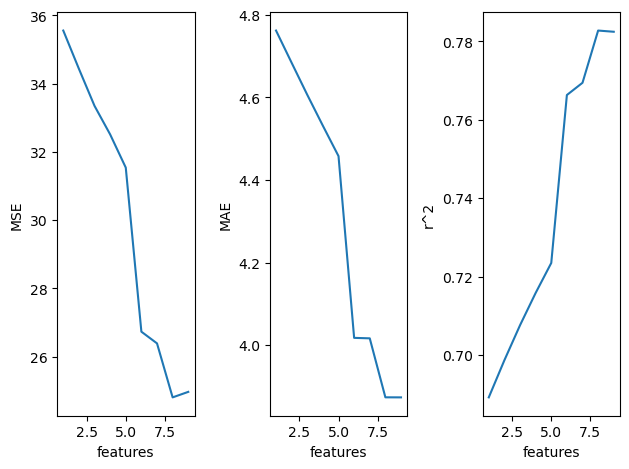

Selected features:  ['x0' 'x8' 'x11' 'x14' 'x15' 'x16' 'x17' 'x18']
Feature importances: [0.80868939 0.00556713 0.00379591 0.01870872 0.0123267  0.08652446
 0.00856573 0.05582196]


In [72]:
################################################################################
# GradientBoostingRegressor con SelectKBest
################################################################################
print("----- GradientBoostingRegressor con SelectKBest -----")
mse_nfeat = []
mae_nfeat = []
r2_nfeat = []
for n_feat in n_feats:
    print('---- n features =', n_feat)

    mse_cv = []
    mae_cv = []
    r2_cv = []

    kf = KFold(n_splits=5, shuffle=True)

    for train_index, test_index in kf.split(x):
        x_train = x[train_index, :]
        y_train = y[train_index]

        gbr_cv = GradientBoostingRegressor()

        fselection_cv = SelectKBest(f_regression, k=n_feat)
        x_train = fselection_cv.fit_transform(x_train, y_train)

        gbr_cv.fit(x_train, y_train)

        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = gbr_cv.predict(x_test)

        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)

        mae_i = mean_absolute_error(y_test, y_pred)
        mae_cv.append(mae_i)

        r2_i = r2_score(y_test, y_pred)
        r2_cv.append(r2_i)

    mse = np.average(mse_cv)
    mse_nfeat.append(mse)

    mae = np.average(mae_cv)
    mae_nfeat.append(mae)

    r2 = np.average(r2_cv)
    r2_nfeat.append(r2)

    print('MSE:', mse, '  MAE:', mae, '  R^2:', r2)

opt_index = np.argmin(mse_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot(n_feats, mse_nfeat)
axs[0].set_xlabel("features")
axs[0].set_ylabel("MSE")

axs[1].plot(n_feats, mae_nfeat)
axs[1].set_xlabel("features")
axs[1].set_ylabel("MAE")

axs[2].plot(n_feats, r2_nfeat)
axs[2].set_xlabel("features")
axs[2].set_ylabel("r^2")

plt.show()

gbr = GradientBoostingRegressor()
fselection = SelectKBest(f_regression, k=opt_features)
fselection.fit(x, y)

print("Selected features: ", fselection.get_feature_names_out())

x_transformed = fselection.transform(x)
gbr.fit(x_transformed, y)
print("Feature importances:", gbr.feature_importances_)

<strong>GradientBoostingRegressor con SequentialFeatureSelector</strong>

----- GradientBoostingRegressor con SequentialFeatureSelector -----
---- n features = 1
MSE: 113.3822031663115   MAE: 8.655214895051088   R^2: 0.008892544264443525
---- n features = 2
MSE: 111.80014078608141   MAE: 8.587175885350796   R^2: 0.02212571556683336
---- n features = 3
MSE: 109.65006665854693   MAE: 8.503608626546585   R^2: 0.040623614417159934
---- n features = 4
MSE: 109.85841997948569   MAE: 8.467354544934702   R^2: 0.03994758465516037
---- n features = 5
MSE: 109.33879717662712   MAE: 8.437687366934387   R^2: 0.044553362779227876
---- n features = 6
MSE: 109.17820094405124   MAE: 8.466339440785818   R^2: 0.04577272096630021
---- n features = 7
MSE: 108.69693043862029   MAE: 8.433340421264973   R^2: 0.04934250062589825
---- n features = 8
MSE: 108.23591979063497   MAE: 8.422728499016992   R^2: 0.05356428397562314
---- n features = 9
MSE: 108.32970346939862   MAE: 8.410990747185114   R^2: 0.052844563887470365
Optimal number of features:  8


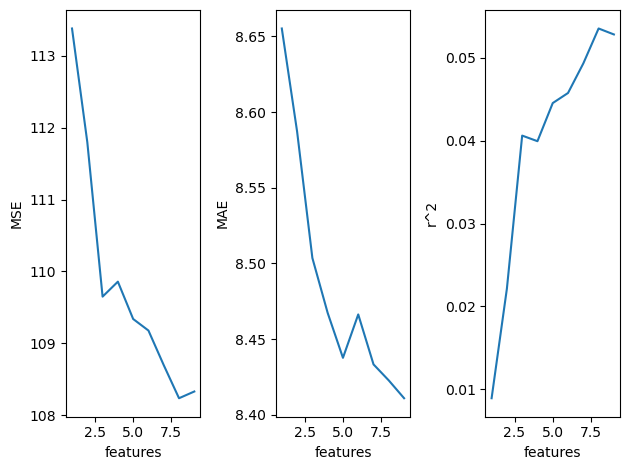

Selected features:  ['x2' 'x4' 'x5' 'x6' 'x7' 'x11' 'x12' 'x17']
Feature importances: [0.1430257  0.01863453 0.09726113 0.0509681  0.08708926 0.19668229
 0.16780606 0.23853295]


In [73]:
################################################################################
# GradientBoostingRegressor con SequentialFeatureSelector
################################################################################
print("----- GradientBoostingRegressor con SequentialFeatureSelector -----")
mse_nfeat = []
mae_nfeat = []
r2_nfeat = []
for n_feat in n_feats:
    print('---- n features =', n_feat)

    mse_cv = []
    mae_cv = []
    r2_cv = []

    kf = KFold(n_splits=5, shuffle=True)

    for train_index, test_index in kf.split(x):
        x_train = x[train_index, :]
        y_train = y[train_index]

        gbr_cv = GradientBoostingRegressor()

        fselection_cv = SequentialFeatureSelector(gbr_cv, n_features_to_select=n_feat)
        x_train = fselection_cv.fit_transform(x_train, y_train)

        gbr_cv.fit(x_train, y_train)

        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = gbr_cv.predict(x_test)

        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)

        mae_i = mean_absolute_error(y_test, y_pred)
        mae_cv.append(mae_i)

        r2_i = r2_score(y_test, y_pred)
        r2_cv.append(r2_i)

    mse = np.average(mse_cv)
    mse_nfeat.append(mse)

    mae = np.average(mae_cv)
    mae_nfeat.append(mae)

    r2 = np.average(r2_cv)
    r2_nfeat.append(r2)

    print('MSE:', mse, '  MAE:', mae, '  R^2:', r2)

opt_index = np.argmin(mse_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot(n_feats, mse_nfeat)
axs[0].set_xlabel("features")
axs[0].set_ylabel("MSE")

axs[1].plot(n_feats, mae_nfeat)
axs[1].set_xlabel("features")
axs[1].set_ylabel("MAE")

axs[2].plot(n_feats, r2_nfeat)
axs[2].set_xlabel("features")
axs[2].set_ylabel("r^2")

plt.show()

gbr = GradientBoostingRegressor()
fselection = SequentialFeatureSelector(gbr, n_features_to_select=opt_features)
fselection.fit(x, y)

print("Selected features: ", fselection.get_feature_names_out())

x_transformed = fselection.transform(x)
gbr.fit(x_transformed, y)
print("Feature importances:", gbr.feature_importances_)

<strong>GradientBoostingRegressor con RFE</strong>

----- GradientBoostingRegressor con RFE -----
---- n features = 1
MSE: 35.5584287599345   MAE: 4.759231665709184   R^2: 0.6888173562100104
---- n features = 2
MSE: 27.697372877571514   MAE: 4.001063098472148   R^2: 0.7580753555739821
---- n features = 3
MSE: 24.726592625455773   MAE: 3.811977722530029   R^2: 0.7831700065066156
---- n features = 4
MSE: 22.878667405717746   MAE: 3.660849562435189   R^2: 0.799752437725273
---- n features = 5
MSE: 23.115859685605148   MAE: 3.7144432291088805   R^2: 0.7976973021544197
---- n features = 6
MSE: 22.216672754570073   MAE: 3.621793189367917   R^2: 0.8058985496495866
---- n features = 7
MSE: 23.078348556169658   MAE: 3.6931208500150774   R^2: 0.7980610000447843
---- n features = 8
MSE: 24.09249417187479   MAE: 3.7993657033813806   R^2: 0.7890766288628324
---- n features = 9
MSE: 23.76829687997255   MAE: 3.7745772764718337   R^2: 0.7921045416481455
Optimal number of features:  6


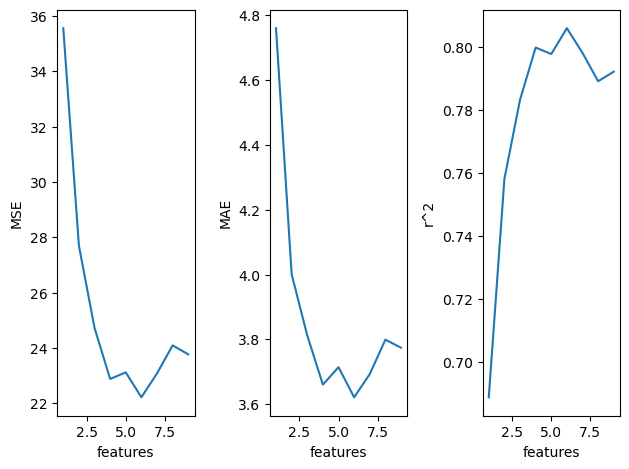

Selected features:  [ True  True False  True False False False False False False False False
 False False  True False  True False  True]
Feature importances: [0.8056533  0.03155998 0.01307666 0.01185693 0.09517057 0.04268256]


In [74]:
################################################################################
# GradientBoostingRegressor con RFE
################################################################################
print("----- GradientBoostingRegressor con RFE -----")
mse_nfeat = []
mae_nfeat = []
r2_nfeat = []
for n_feat in n_feats:
    print('---- n features =', n_feat)

    mse_cv = []
    mae_cv = []
    r2_cv = []

    kf = KFold(n_splits=5, shuffle=True)

    for train_index, test_index in kf.split(x):
        x_train = x[train_index, :]
        y_train = y[train_index]

        gbr_cv = GradientBoostingRegressor()

        fselection_cv = RFE(gbr_cv, n_features_to_select=n_feat)
        x_train = fselection_cv.fit_transform(x_train, y_train)

        gbr_cv.fit(x_train, y_train)

        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = gbr_cv.predict(x_test)

        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)

        mae_i = mean_absolute_error(y_test, y_pred)
        mae_cv.append(mae_i)

        r2_i = r2_score(y_test, y_pred)
        r2_cv.append(r2_i)

    mse = np.average(mse_cv)
    mse_nfeat.append(mse)

    mae = np.average(mae_cv)
    mae_nfeat.append(mae)

    r2 = np.average(r2_cv)
    r2_nfeat.append(r2)

    print('MSE:', mse, '  MAE:', mae, '  R^2:', r2)

opt_index = np.argmin(mse_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot(n_feats, mse_nfeat)
axs[0].set_xlabel("features")
axs[0].set_ylabel("MSE")

axs[1].plot(n_feats, mae_nfeat)
axs[1].set_xlabel("features")
axs[1].set_ylabel("MAE")

axs[2].plot(n_feats, r2_nfeat)
axs[2].set_xlabel("features")
axs[2].set_ylabel("r^2")

plt.show()

gbr = GradientBoostingRegressor()
fselection = RFE(gbr, n_features_to_select=opt_features)
fselection.fit(x, y)

print("Selected features: ", fselection.support_)

x_transformed = fselection.transform(x)
gbr.fit(x_transformed, y)
print("Feature importances:", gbr.feature_importances_)

<h2>1. ¿Consideras que el modelo de regresión lineal es adecuado para los datos? ¿Por qué?</h2>
    <p>El modelo de regresión lineal no parece ser el más adecuado para estos datos. Esto se debe a que el valor de <strong>R²</strong> es bajo (0.1165), lo que indica que solo el 11.65% de la variabilidad en los datos se explica por el modelo lineal. Además, los valores de MSE (101.08) y MAE (8.34) son relativamente altos, sugiriendo que las predicciones del modelo tienen un margen de error significativo.</p>

<h2>2. ¿Qué método de selección de características consideras que funciona bien con los datos? ¿Por qué?</h2>
<p>El método Filter parece funcionar bien para la selección de características con estos datos. Seleccionar 9 características con este método produjo un <strong>R²</strong> más alto (0.1179) en comparación con otros métodos como RFE, que tuvo un desempeño bastante pobre. Esto sugiere que Filter pudo identificar características más relevantes que mejoraron el ajuste del modelo.</p>

<h2>3. Del proceso de selección de características, ¿puedes identificar algunas que sean sobresalientes? ¿Qué información relevante observas de dichas características?</h2>
<p>Al revisar los modelos seleccionados por Filter y Wrapper, algunas características sobresalientes son 'x0', 'x7', 'x8', 'x11' y 'x17'. Estas características aparecen frecuentemente en los modelos con el mejor desempeño:</p>
<ul>
    <li><strong>'x0', 'x7', 'x8', 'x11', 'x17'</strong>: Estas características han mostrado ser útiles tanto en modelos lineales como no lineales. En el método Filter para regresión lineal, ayudaron a aumentar el <strong>R²</strong> a 0.1179. En el modelo no lineal KNN, las características 'x0', 'x11', 'x15' y 'x17' lograron un <strong>R²</strong> de 0.7781.</li>
</ul>

<h2>4. ¿Los modelos de regresión no lineal funcionaron mejor que el lineal? ¿Por qué?</h2> <p>Sí, los modelos de regresión no lineal, como K-Nearest Neighbors (KNN) y Decision Tree Regressor, demostraron ser mucho mejores que el modelo lineal. Los valores de MSE y MAE para estos modelos son notablemente más bajos:</p> <ul> <li><strong>KNN:</strong> El MSE fue de 12.50 y el MAE de 2.00, lo que indica que el modelo tiene un menor margen de error en sus predicciones.</li> <li><strong>Decision Tree Regressor:</strong> El MSE fue de 10.35 y el MAE de 1.75, sugiriendo una mejor capacidad de ajuste y precisión en comparación con el modelo lineal.</li> </ul> <p>Estos valores más bajos de MSE y MAE sugieren que los modelos no lineales capturan mejor las relaciones complejas en los datos. Además, otros modelos no lineales como el RandomForestRegressor y el GradientBoostingRegressor también mostraron un rendimiento superior al modelo lineal, aunque no tan destacado como KNN y Decision Tree:</p> <ul> <li><strong>RandomForestRegressor:</strong> MSE de 21.59 y MAE de 3.07, con un R² de 0.81. Este modelo logró seleccionar 9 características óptimas, lo que indica que puede capturar bien las relaciones en los datos, aunque con un mayor margen de error comparado con KNN y Decision Tree.</li> <li><strong>GradientBoostingRegressor:</strong> MSE de 24.97 y MAE de 3.87, con un R² de 0.78. Este modelo también seleccionó varias características relevantes, lo que sugiere un enfoque robusto para capturar patrones, pero con una precisión ligeramente inferior.</li> <li><strong>SVR:</strong> En contraste, el SVR tuvo un rendimiento inferior con un MSE de 103.97, MAE de 8.23, y un R² de 0.09, indicando que no logró capturar adecuadamente las relaciones en los datos, posiblemente debido a la selección de una sola característica.</li> </ul>

<h2>5. ¿Se puede concluir algo interesante sobre los resultados de modelar estos datos con regresión? Argumenta tu respuesta.</h2>
<p>Los resultados muestran que las relaciones entre las variables predictoras y la variable de respuesta son complejas y probablemente no lineales. Esto queda claro al comparar los valores de MSE y MAE de los modelos no lineales con los del modelo lineal. Los modelos no lineales tienen valores de MSE y MAE mucho más bajos, indicando que capturan mejor la variabilidad en los datos. Esto resalta la importancia de considerar modelos más complejos y técnicas adecuadas para manejar conjuntos de datos con relaciones no lineales.</p>
